# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 559


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&appid=weather_api_key"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | brisas de zicatela
Processing Record 4 of Set 1 | masterton
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | riachao das neves
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | mahavelona
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | shalqar
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | newman
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | urcos
Processing Record 19 of Set 1 | colonia
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | an nuhud
Processing Record 22 of Set 1 | puerto natales

Processing Record 41 of Set 4 | severo-yeniseyskiy
Processing Record 42 of Set 4 | deschutes river woods
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | yuzhno-kurilsk
Processing Record 46 of Set 4 | at taraf
Processing Record 47 of Set 4 | nungua
Processing Record 48 of Set 4 | nar'yan-mar
Processing Record 49 of Set 4 | tolanaro
Processing Record 0 of Set 5 | altai
Processing Record 1 of Set 5 | ahau
City not found. Skipping...
Processing Record 2 of Set 5 | okha
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | villa la angostura
Processing Record 5 of Set 5 | isafjordur
Processing Record 6 of Set 5 | kaedi
Processing Record 7 of Set 5 | jiwani
Processing Record 8 of Set 5 | east ballina
Processing Record 9 of Set 5 | yoloten
Processing Record 10 of Set 5 | corumba
Processing Record 11 of Set 5 | boguchany
Processing Record 12 of Set 5 | college
Processing Record 13 of Set 5 | vorkuta
Processing Record

Processing Record 32 of Set 8 | mariehamn
Processing Record 33 of Set 8 | lethem
Processing Record 34 of Set 8 | swift current
Processing Record 35 of Set 8 | arvayheer
Processing Record 36 of Set 8 | fortuna
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | zakynthos
Processing Record 39 of Set 8 | mirny
Processing Record 40 of Set 8 | khandyga
Processing Record 41 of Set 8 | parkes
Processing Record 42 of Set 8 | holbrook
Processing Record 43 of Set 8 | dakhla
Processing Record 44 of Set 8 | la malbaie
Processing Record 45 of Set 8 | tadine
Processing Record 46 of Set 8 | puerto lleras
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | olyokminsk
Processing Record 49 of Set 8 | yazykovo
Processing Record 0 of Set 9 | lunino
Processing Record 1 of Set 9 | lyantor
Processing Record 2 of Set 9 | ghat
Processing Record 3 of Set 9 | katsuren-haebaru
Processing Record 4 of Set 9 | luderitz
Processing Record 5 of Set 9 | carnarvon
Processing Re

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,259.00,72,75,1.54,CA,1702492584
1,port-aux-francais,-49.3500,70.2167,280.74,97,100,19.11,TF,1702492567
2,brisas de zicatela,15.8369,-97.0419,303.21,48,75,2.94,MX,1702492640
3,masterton,-40.9597,175.6575,288.09,77,4,1.27,NZ,1702493072
4,udachny,66.4167,112.4000,245.62,82,100,4.80,RU,1702492584


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,259.00,72,75,1.54,CA,1702492584
1,port-aux-francais,-49.3500,70.2167,280.74,97,100,19.11,TF,1702492567
2,brisas de zicatela,15.8369,-97.0419,303.21,48,75,2.94,MX,1702492640
3,masterton,-40.9597,175.6575,288.09,77,4,1.27,NZ,1702493072
4,udachny,66.4167,112.4000,245.62,82,100,4.80,RU,1702492584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

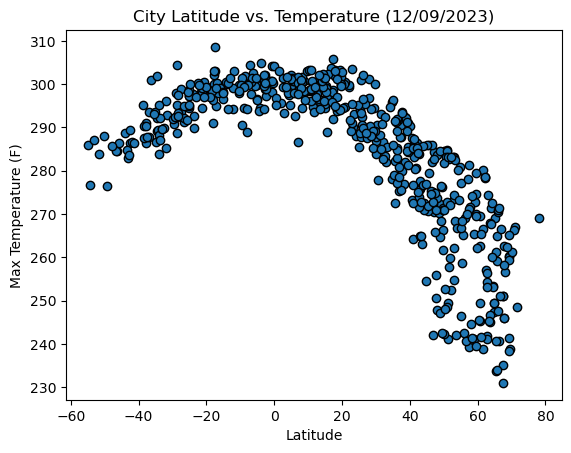

In [39]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

plt.title("City Latitude vs. Temperature (12/09/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

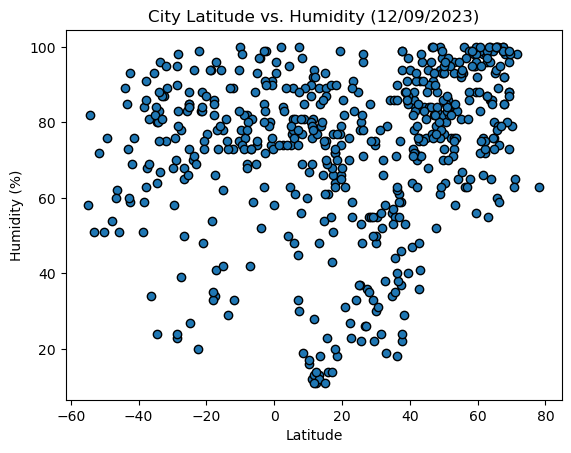

In [41]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

plt.title("City Latitude vs. Humidity (12/09/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

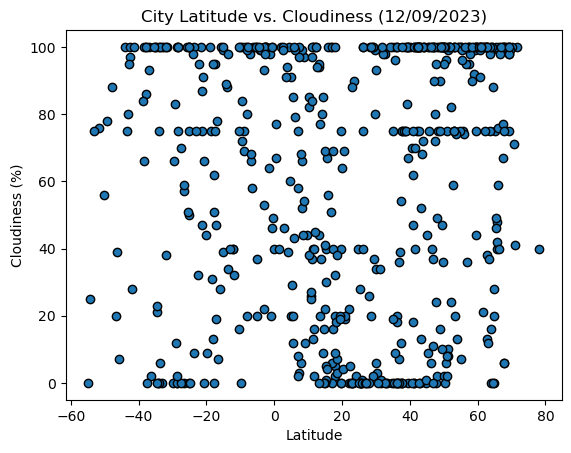

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

plt.title("City Latitude vs. Cloudiness (12/09/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

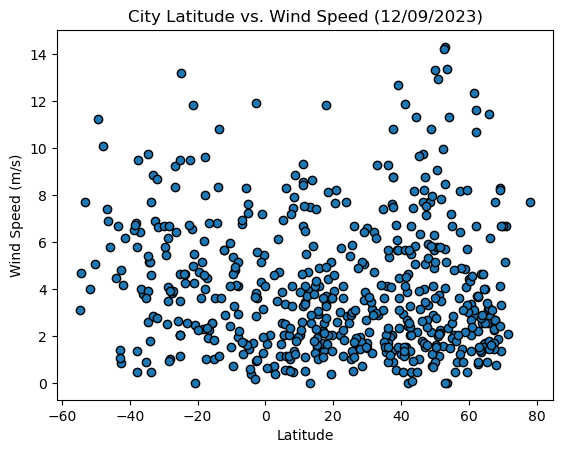

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

plt.title("City Latitude vs. Wind Speed (12/09/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\conne\OneDrive\Desktop\NU-VIRT-DATA-PT-10-2023-U-LOLC\02-Homework\06-Python-APIs\Instructions\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_corordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,259.00,72,75,1.54,CA,1702492584
2,brisas de zicatela,15.8369,-97.0419,303.21,48,75,2.94,MX,1702492640
4,udachny,66.4167,112.4000,245.62,82,100,4.80,RU,1702492584
9,shalqar,47.8333,59.6000,261.04,32,100,9.95,KZ,1702493073
10,klyuchi,52.2667,79.1667,249.73,84,83,2.52,RU,1702492591


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [83]:
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,280.74,97,100,19.11,TF,1702492567
3,masterton,-40.9597,175.6575,288.09,77,4,1.27,NZ,1702493072
5,riachao das neves,-11.7461,-44.9100,310.02,22,4,2.07,BR,1702493072
6,grytviken,-54.2811,-36.5092,276.39,97,100,3.28,GS,1702492566
7,mahavelona,-17.6848,49.5087,300.14,85,88,1.36,MG,1702493072


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7151521229090637


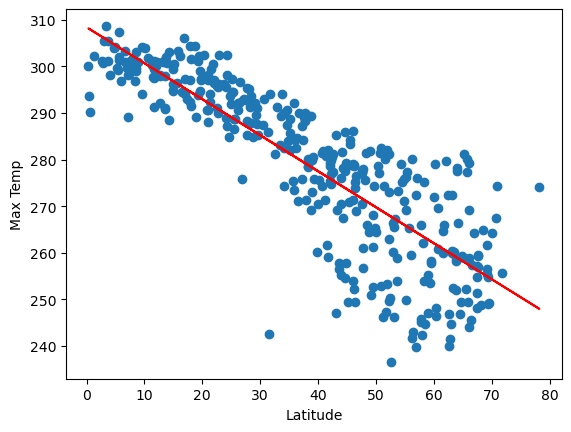

In [96]:
# Linear regression on Northern Hemisphere
# Define your X and Y values

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0,0))

# plt.text(0, 0, f"y = {round(slope, 2)}x + {round(intercept, 2)}", bbox=dict(facecolor="white", edgecolor="black", pad=5))

The r-value is: 0.4495177362695968


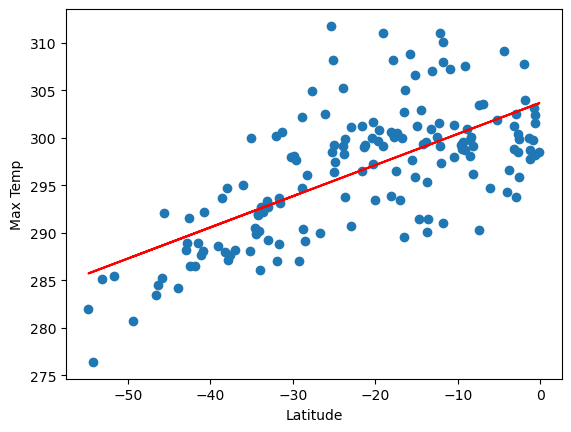

In [97]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0,0))

# **Discussion about the linear relationship: It is clear the max temperature increases as you get closer to 0 latitude in the northern and southern hemisphere. The plots show the temperatures in cities across both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19495558842745248


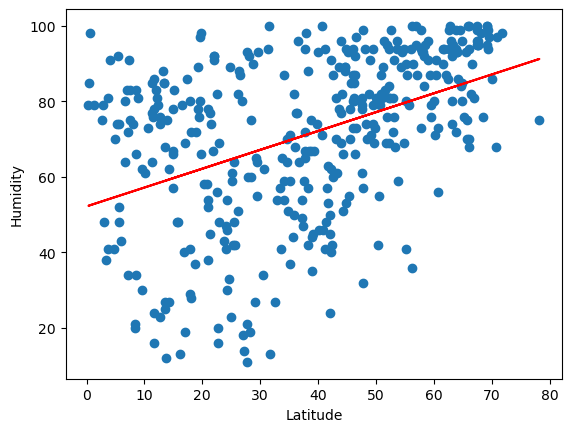

In [98]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0,0))

The r-value is: 0.008016071168502214


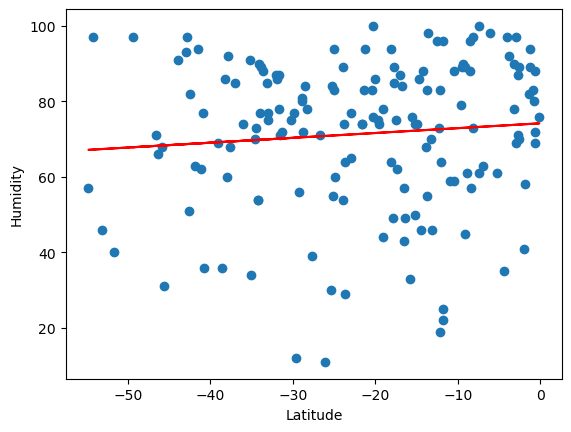

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0,0))

# **Discussion about the linear relationship: The two plots show the humidity for multiple cities across the nothern and southern hemispheres. While it appears that the further away you move from 0 latitude the more humid it gets in the northern hemisphere, both plots fail to produce any significant correlation based on their R-Values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10246651124114439


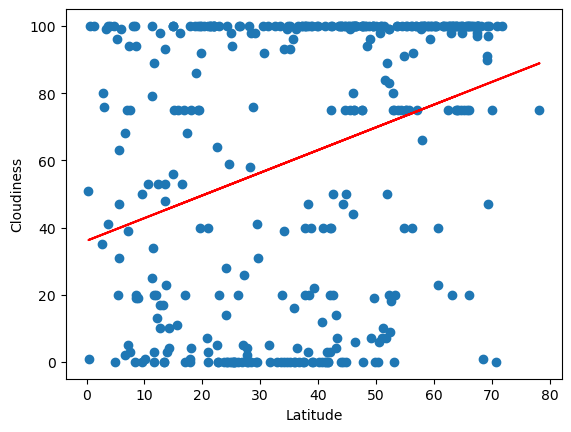

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (0,0))

The r-value is: 0.009148487769070958


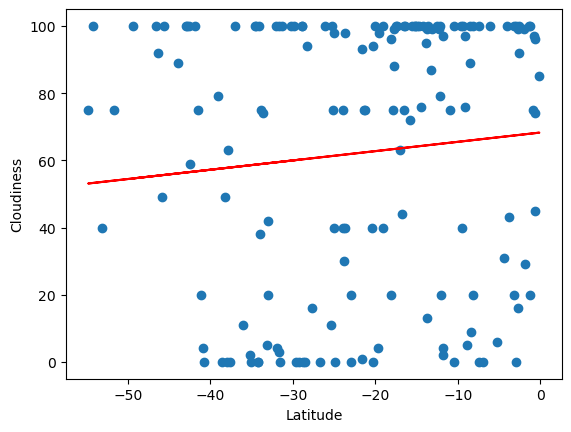

In [101]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (0,0))

# **Discussion about the linear relationship: The plots show the level of cloud different cities experience across the northern and southern hemispheres. The data is very scattered and there does not appear to be a correlation between these two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011352465571313175


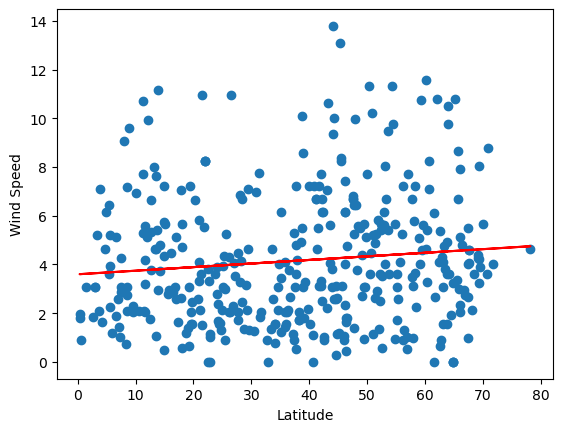

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,0))

The r-value is: 0.14254748813073853


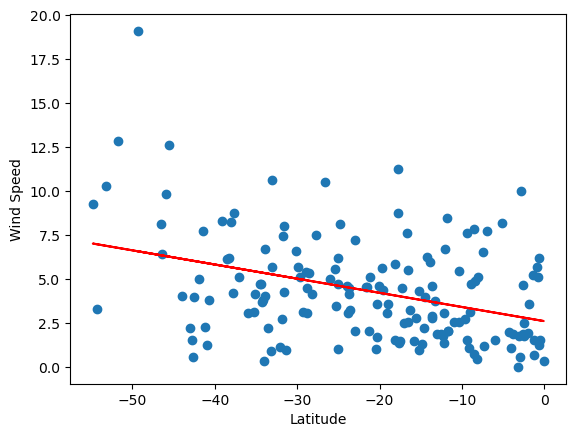

In [103]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,0))

# **Discussion about the linear relationship: The two plots show the wind speed of multiple cities across the northern and southern hemisphere. There does not appear to be any correlation between the two variables.